<a href="https://colab.research.google.com/github/Ranjithkrishnasamy/Resub-DS-assignments-1-3/blob/main/Multilinear%20regression(Toyota%20Corolla).ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [17]:
import pandas as pd
import numpy as np
import statsmodels.api as sm
import matplotlib.pyplot as plt
import seaborn as sns
from scipy import stats
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import RidgeCV

In [2]:
path = r"/content/ToyotaCorolla.csv"

In [3]:
corolla = pd.read_csv(path)

In [4]:
corolla = corolla[["Price", "Age_08_04", "KM", "HP", "cc", "Doors", "Gears", "Quarterly_Tax", "Weight"]]

In [5]:
corolla.dropna(inplace=True)

In [6]:
X = corolla.drop('Price', axis=1)
y = corolla['Price']

In [18]:
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

In [19]:
ridge_model = RidgeCV(alphas=[0.1, 1.0, 10.0])
ridge_model.fit(X_scaled, y)

RidgeCV(alphas=[0.1, 1.0, 10.0])

In [20]:
model_1 = sm.OLS(y, sm.add_constant(X)).fit()
print("Model 1 (No transformation) - R-squared:", model_1.rsquared)

Model 1 (No transformation) - R-squared: 0.8637627463428191


In [21]:
model_2 = sm.OLS(y, sm.add_constant(np.log1p(X))).fit()
print("Model 2 (Logarithmic transformation) - R-squared:", model_2.rsquared)

Model 2 (Logarithmic transformation) - R-squared: 0.8456328531485093


In [22]:
model_3 = sm.OLS(y, sm.add_constant(np.sqrt(X))).fit()
print("Model 3 (Square root transformation) - R-squared:", model_3.rsquared)

Model 3 (Square root transformation) - R-squared: 0.8767321795749018


In [23]:
X_boxcox = X.apply(lambda x: stats.boxcox(x + 1)[0])
model_4 = sm.OLS(y, sm.add_constant(X_boxcox)).fit()
print("Model 4 (Box-Cox transformation) - R-squared:", model_4.rsquared)

Model 4 (Box-Cox transformation) - R-squared: 0.7858776607536523


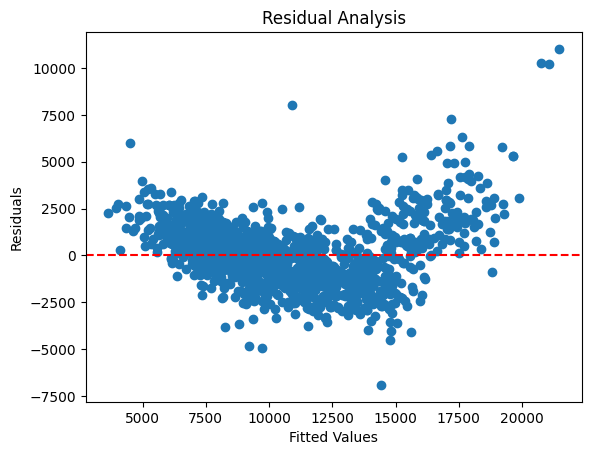

In [24]:
model_residuals = model_4.resid
plt.scatter(model_4.fittedvalues, model_residuals)
plt.axhline(y=0, color='red', linestyle='--')
plt.xlabel('Fitted Values')
plt.ylabel('Residuals')
plt.title('Residual Analysis')
plt.show()

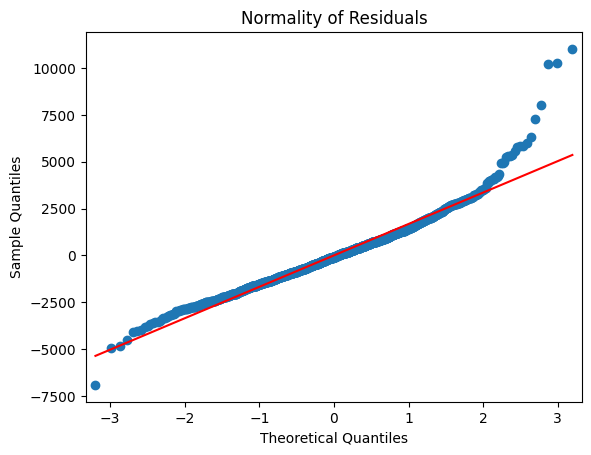

In [25]:
sm.qqplot(model_residuals, line='s')
plt.xlabel('Theoretical Quantiles')
plt.ylabel('Sample Quantiles')
plt.title('Normality of Residuals')
plt.show()

In [26]:
transformed_columns = X_boxcox.columns
X_no_boxcox = X.drop(columns=transformed_columns)

In [27]:
if X_no_boxcox.shape[1] > 0:
    corr_matrix = X_no_boxcox.corr()
    sns.heatmap(corr_matrix, annot=True, cmap='coolwarm')
    plt.title('Collinearity Heatmap')
    plt.show()
else:
    print('No columns remaining after Box-Cox transformation')

No columns remaining after Box-Cox transformation


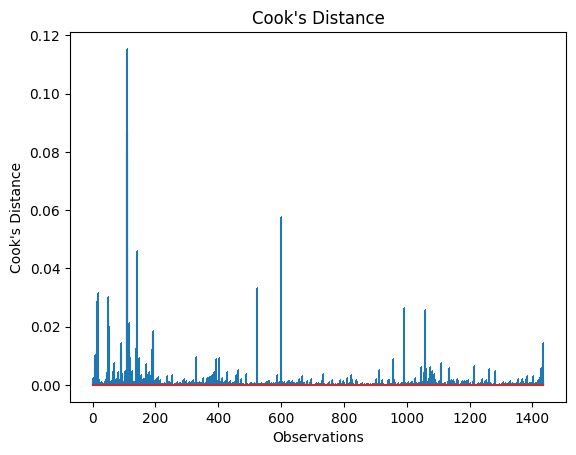

In [28]:
influence = model_4.get_influence()
cooks_distance = influence.cooks_distance[0]
plt.stem(np.arange(len(X)), cooks_distance, markerfmt=",")
plt.xlabel('Observations')
plt.ylabel("Cook's Distance")
plt.title("Cook's Distance")
plt.show()